In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
# matplotlib.use('Agg')
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter

import numpy as np
import scipy
import scipy.interpolate as interp


In [19]:
# df = pd.read_csv('data_export/map_export_[-141.8,98.2]_[-327.2,192.8]_[-100.0,100.0].csv') 
df = pd.read_csv('data_export/map_export_[-141.8,98.2]_[-327.2,192.8]_[-100.0,300.0].csv')
# df = pd.read_csv('data_export/map_export_[-141.8,98.2]_[-327.2,192.8]_[-200.0,400.0].csv')

In [20]:
x_all = df.x.unique() 
y_all = df.y.unique()
z_all = df.z.unique()


print x_all
print y_all
print z_all

[  98.2   58.2   18.2  -21.8  -61.8 -101.8 -141.8   -1.8   38.2   78.2]
[ 192.75  152.75  112.75   72.75   32.75   -7.25  -47.25  -87.25 -127.25
 -167.25 -207.25 -247.25 -287.25 -327.25]
[-74.28 -45.78  -5.78  34.22  74.22 114.22]


In [21]:

df_sub_lim = df[(df.y>-50) & (df.x >-100) & (df.z <80)]
print np.average(df_sub_lim.B_x)
print np.average(df_sub_lim.B_y)
print np.average(df_sub_lim.B_z)

print  df_sub_lim.x.unique() 
print  df_sub_lim.y.unique() 
print  df_sub_lim.z.unique() 


-0.3734142476190477
-0.3876939841269841
-2.0066402222222224
[ 98.2  58.2  18.2 -21.8 -61.8  -1.8  38.2  78.2]
[192.75 152.75 112.75  32.75  -7.25 -47.25]
[-74.28 -45.78  -5.78  34.22  74.22]


0_98.200000
1_58.200000
2_18.200000
3_-21.800000
4_-61.800000
5_-101.800000
6_-141.800000
7_-1.800000
8_38.200000
9_78.200000


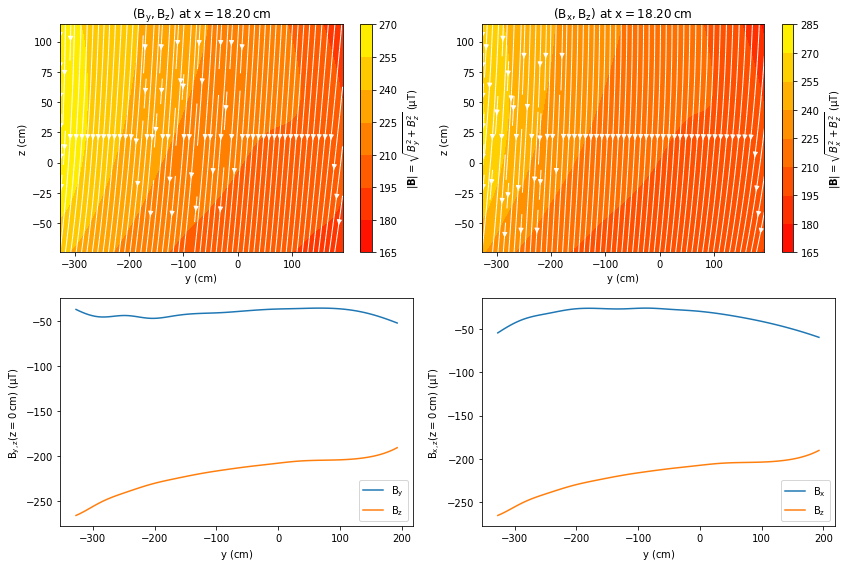

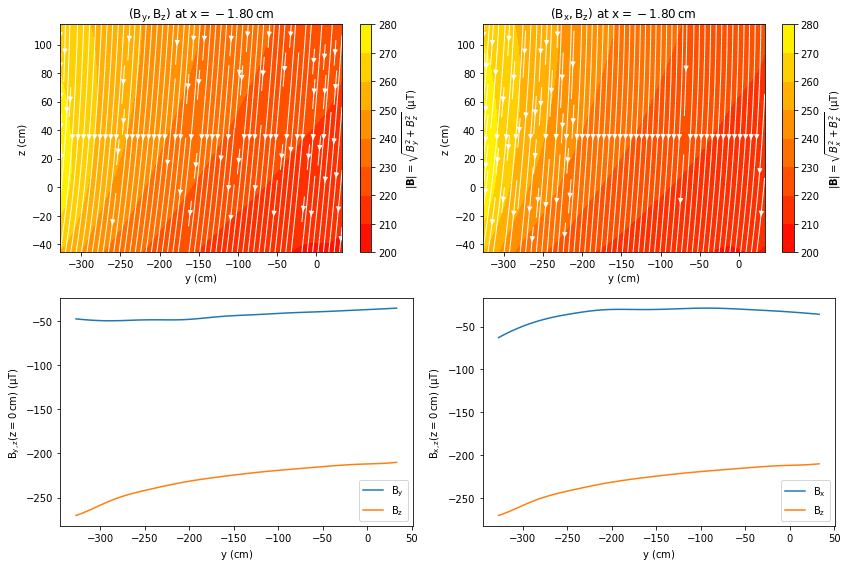

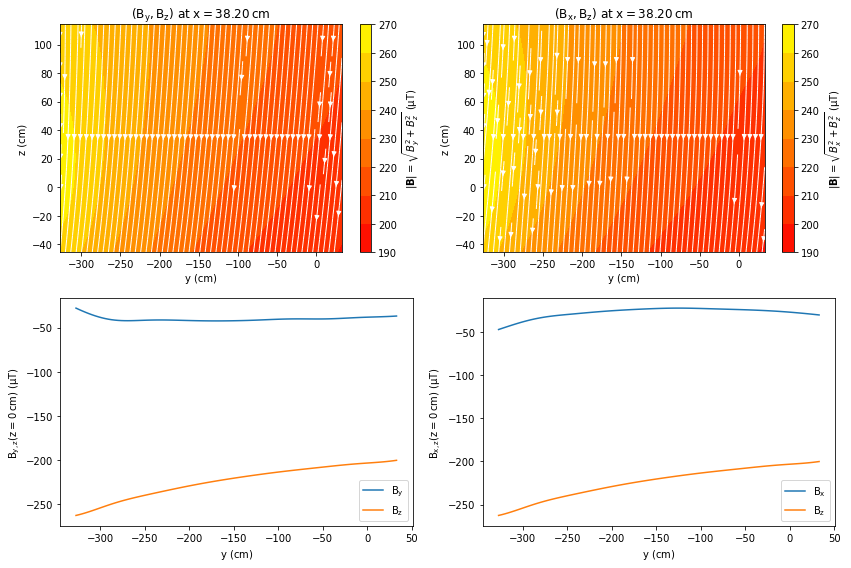

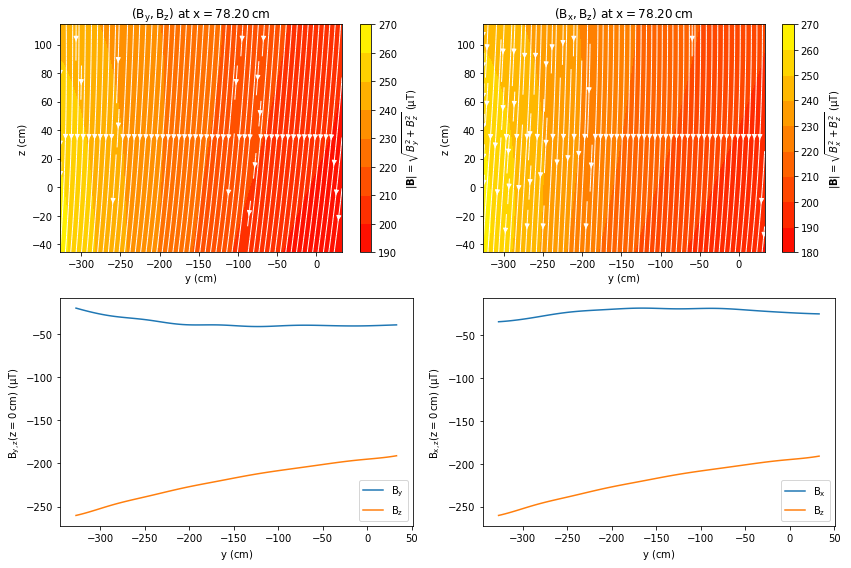

In [22]:
NL  = 100
for k in range(x_all.size):
    x_k = x_all[k]
    

    print '%d_%f' %(k, x_k)
    df_all_sub = df[df.x==x_k]
    y_min = np.min(df_all_sub.y)
    y_max = np.max(df_all_sub.y)
    z_min = np.min(df_all_sub.z)
    z_max = np.max(df_all_sub.z)
    
    if (y_min!=y_max) & (z_min!=z_max):

        y_dense, z_dense = np.meshgrid(np.linspace(y_min,y_max, NL),np.linspace(z_min, z_max, NL))

        Bx_rbf = interp.Rbf(df_all_sub.y, df_all_sub.z, df_all_sub.B_x, function='cubic', smooth=0)  # default smooth=0 for interpolation
        Bx_dense = Bx_rbf(y_dense, z_dense)  # not really a function, but a callable class instance
        By_rbf = interp.Rbf(df_all_sub.y, df_all_sub.z, df_all_sub.B_y, function='cubic', smooth=0)  # default smooth=0 for interpolation
        By_dense = By_rbf(y_dense, z_dense)  # not really a function, but a callable class instance
        Bz_rbf = interp.Rbf(df_all_sub.y, df_all_sub.z, df_all_sub.B_z, function='cubic', smooth=0)  # default smooth=0 for interpolation
        Bz_dense = Bz_rbf(y_dense, z_dense)  # not really a function, but a callable class instance

        fig0=plt.figure(figsize=(12,8))
        ax0 = fig0.add_subplot(221)
        str0 = ax0.streamplot(y_dense, z_dense, By_dense, Bz_dense, linewidth=1,density=1.8,color='white')
        # cp = ax.contourf(z_dense,y_dense, np.sqrt(Bx_dense**2+By_dense**2)*100, cmap=cm.autumn)
        cp0 = ax0.contourf(y_dense,z_dense, np.sqrt(By_dense**2+Bz_dense**2)*100, cmap=cm.autumn)
        # cp = ax.contour(z_dense,y_dense, np.sqrt(Bx_dense**2+By_dense**2)*100, cmap=cm.binary)
        cb0 = fig0.colorbar(cp0, ax=ax0,label='$|\mathbf{B}|=\sqrt{B_y^2+B_z^2}\,\,\mathsf{(\mu T)}$')

        # lab = cb.set_label('$|\mathbf{B}|=\sqrt{B_x^2+B_y^2+B_z^2}\,\mathsf{(\mu T)}$')
        ax0.set_title('$\mathsf{(B_y, B_z)}$ at $\mathsf{x=%.2f\,cm}$' %x_k)
        ax0.set_xlabel('y (cm)')
        ax0.set_ylabel('z (cm)')

        ax1 = fig0.add_subplot(222)
        str1 = ax1.streamplot(y_dense, z_dense, Bx_dense, Bz_dense, linewidth=1,density=1.8,color='white')
        # cp = ax.contourf(z_dense,y_dense, np.sqrt(Bx_dense**2+By_dense**2)*100, cmap=cm.autumn)
        cp1 = ax1.contourf(y_dense,z_dense, np.sqrt(Bx_dense**2+Bz_dense**2)*100, cmap=cm.autumn)
        # cp = ax.contour(z_dense,y_dense, np.sqrt(Bx_dense**2+By_dense**2)*100, cmap=cm.binary)
        cb1 = fig0.colorbar(cp1, ax=ax1,label='$|\mathbf{B}|=\sqrt{B_x^2+B_z^2}\,\,\mathsf{(\mu T)}$')

        ax1.set_title('$\mathsf{(B_x, B_z)}$ at $\mathsf{x=%.2f\,cm}$' %x_k)
        ax1.set_xlabel('y (cm)')
        ax1.set_ylabel('z (cm)')
        
        ax2 = fig0.add_subplot(223)
        ax2.plot(np.linspace(y_min, y_max, NL), By_rbf(np.linspace(y_min, y_max,NL),np.zeros(NL))*100, label='$\mathsf{B_y}$')
        ax2.plot(np.linspace(y_min, y_max, NL), Bz_rbf(np.linspace(y_min, y_max,NL),np.zeros(NL))*100, label='$\mathsf{B_z}$')
        ax2.set_xlabel('$\mathsf{y\,\,(cm)}$')
        ax2.set_ylabel('$\mathsf{B_{y,z} (z=0\,cm)\,\,(\mu T)}$')
        ax2.legend()

        ax3 = fig0.add_subplot(224)
        ax3.plot(np.linspace(y_min, y_max, NL), Bx_rbf(np.linspace(y_min, y_max,NL),np.zeros(NL))*100, label='$\mathsf{B_x}$')
        ax3.plot(np.linspace(y_min, y_max, NL), Bz_rbf(np.linspace(y_min, y_max,NL),np.zeros(NL))*100, label='$\mathsf{B_z}$')
        ax3.set_xlabel('$\mathsf{y\,\,(cm)}$')
        ax3.set_ylabel('$\mathsf{B_{x,z} (z=0\,cm)\,\,(\mu T)}$')
        ax3.legend()

#         fig0=plt.figure(figsize=(12,4))
#         ax0 = fig0.add_subplot(121)
#         str0 = ax0.streamplot(y_dense, z_dense, By_dense, Bz_dense, linewidth=1,density=1.5,color='white')
#         # cp = ax.contourf(z_dense,y_dense, np.sqrt(Bx_dense**2+By_dense**2)*100, cmap=cm.autumn)
#         cp0 = ax0.contourf(y_dense,z_dense, np.sqrt(By_dense**2+Bz_dense**2)*100, cmap=cm.autumn)
#         # cp = ax.contour(z_dense,y_dense, np.sqrt(Bx_dense**2+By_dense**2)*100, cmap=cm.binary)
#         cb0 = fig0.colorbar(cp0, ax=ax0,label='$|\mathbf{B}|=\sqrt{B_y^2+B_z^2}\,\,\mathsf{(\mu T)}$')

#         # lab = cb.set_label('$|\mathbf{B}|=\sqrt{B_x^2+B_y^2+B_z^2}\,\mathsf{(\mu T)}$')
#         ax0.set_title('$\mathsf{(B_y, B_z)}$ at $\mathsf{x=%.3f\,cm}$' %x_k)
#         ax0.set_xlabel('y (cm)')
#         ax0.set_ylabel('z (cm)')

#         ax1 = fig0.add_subplot(122)
#         str1 = ax1.streamplot(y_dense, z_dense, Bx_dense, Bz_dense, linewidth=1,density=1.5,color='white')
#         # cp = ax.contourf(z_dense,y_dense, np.sqrt(Bx_dense**2+By_dense**2)*100, cmap=cm.autumn)
#         cp1 = ax1.contourf(y_dense,z_dense, np.sqrt(Bx_dense**2+Bz_dense**2)*100, cmap=cm.autumn)
#         # cp = ax.contour(z_dense,y_dense, np.sqrt(Bx_dense**2+By_dense**2)*100, cmap=cm.binary)
#         cb1 = fig0.colorbar(cp1, ax=ax1,label='$|\mathbf{B}|=\sqrt{B_x^2+B_z^2}\,\,\mathsf{(\mu T)}$')

#         ax1.set_title('$\mathsf{(B_x, B_z)}$ at $\mathsf{x=%.3f\,cm}$' %x_k)
#         ax1.set_xlabel('y (cm)')
#         ax1.set_ylabel('z (cm)')



        fig0.tight_layout()
        fig0.savefig('planer_plots/plane_k_%d.png' %k)

192.75
152.75
112.75
72.75
32.75
-7.25
-47.25
-87.25
-127.25
-167.25
-207.25
-247.25
-287.25
-327.25


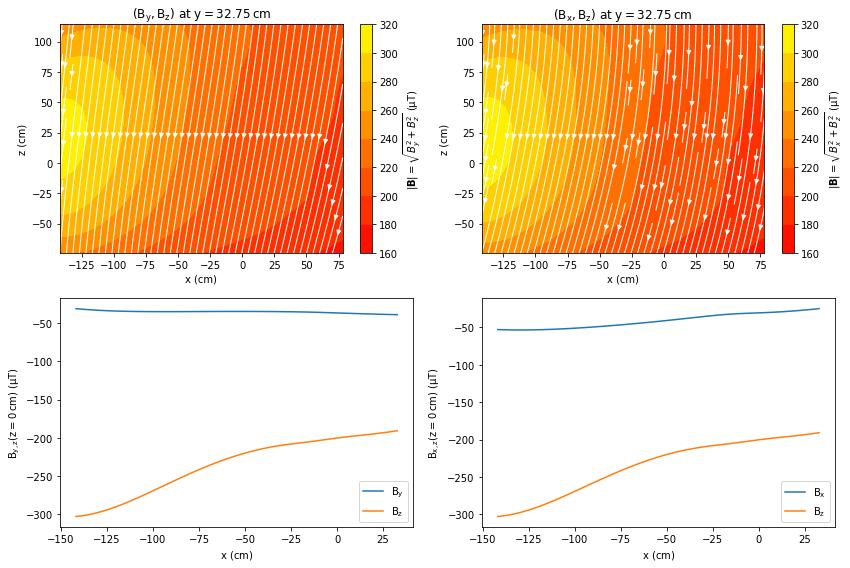

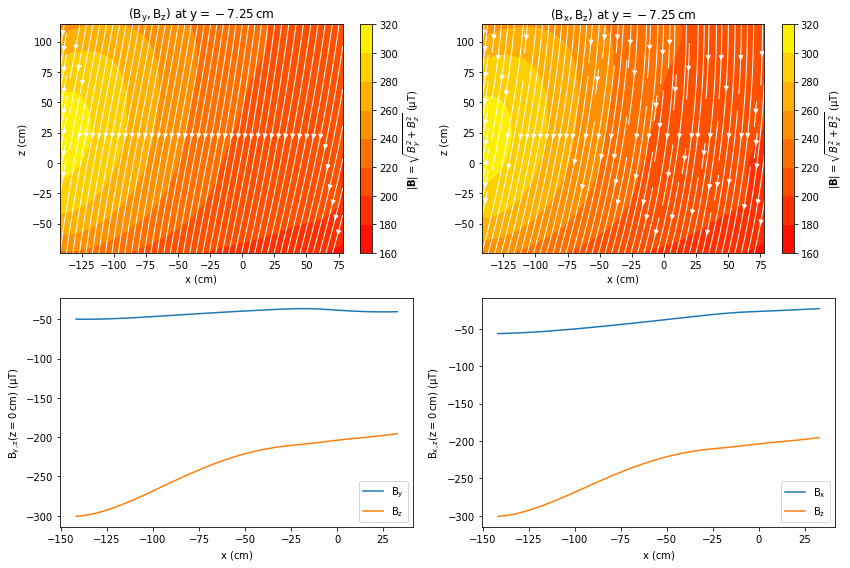

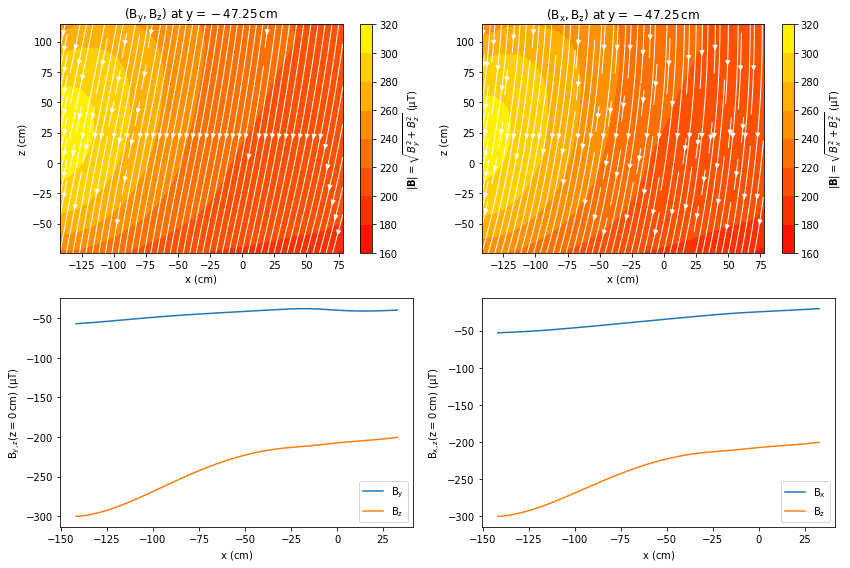

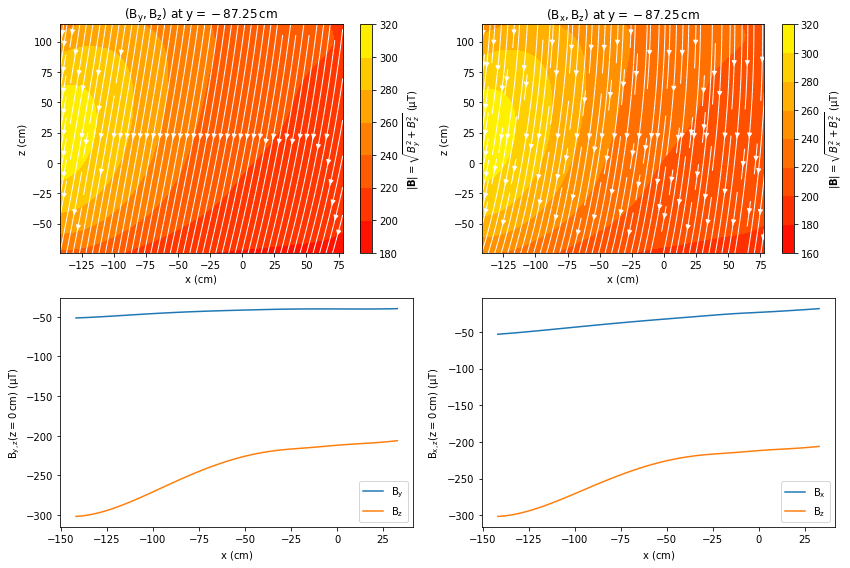

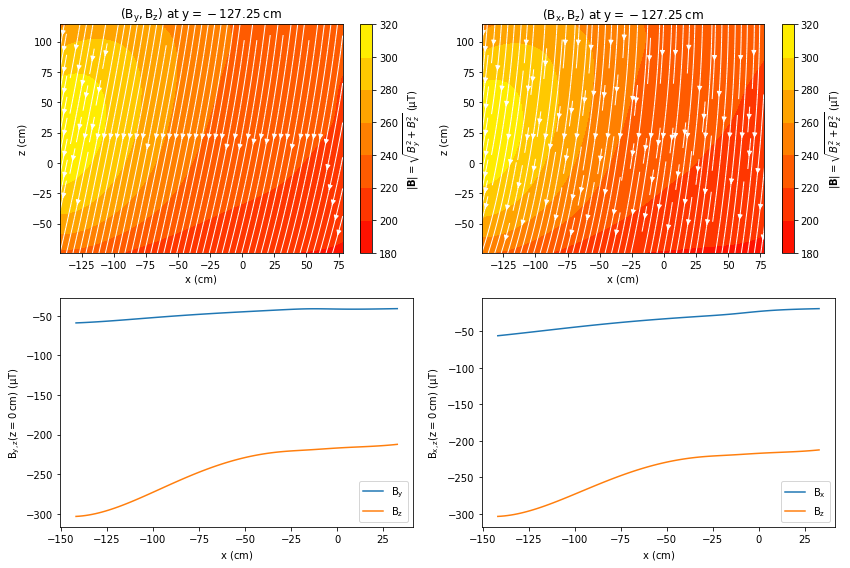

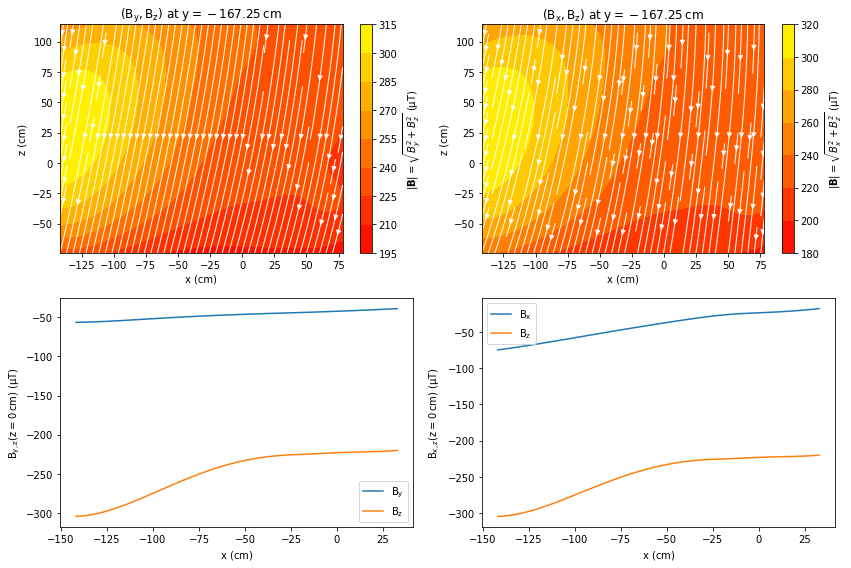

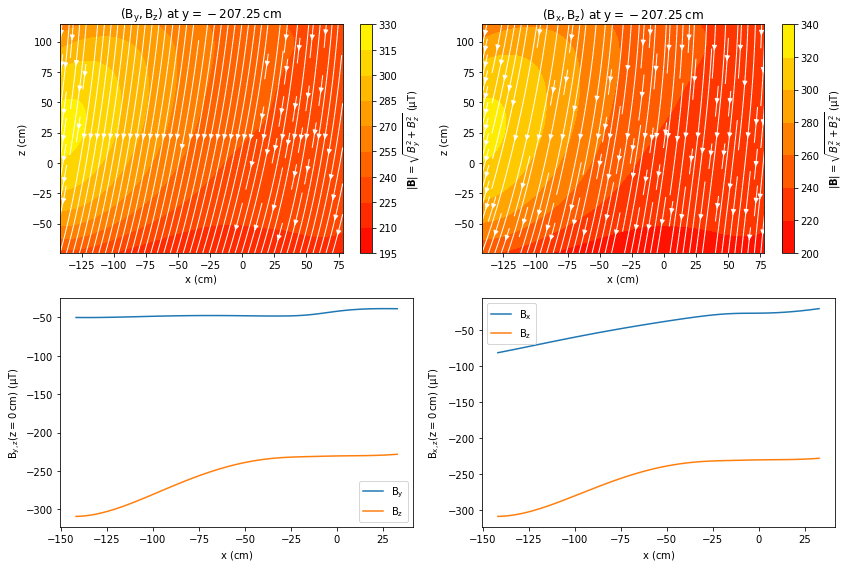

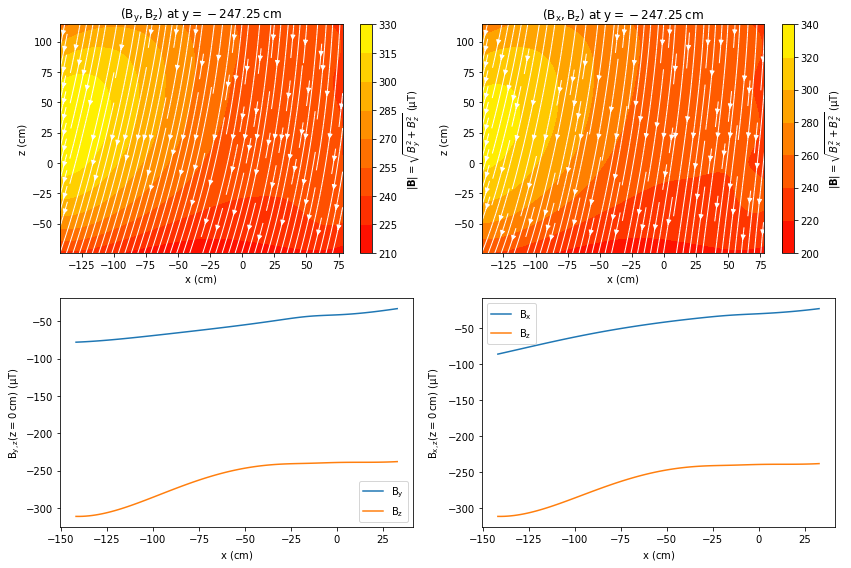

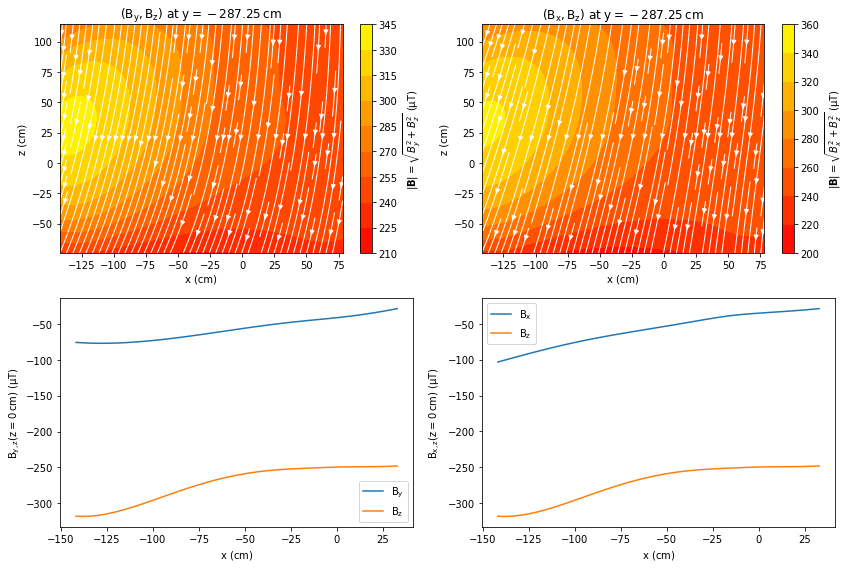

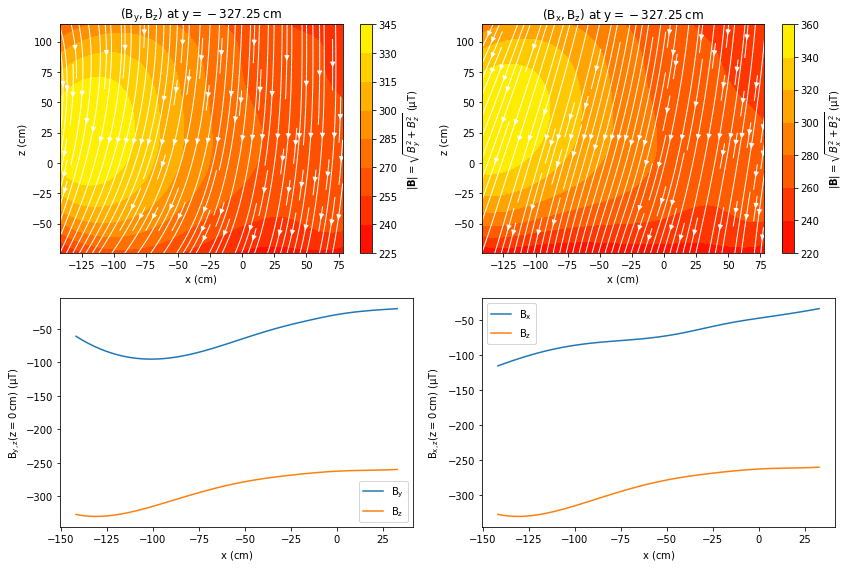

In [23]:
NL  = 100
for l in range(y_all.size):
    y_l = y_all[l]
    

    print y_l
    df_all_sub = df[df.y==y_l]
    x_min = np.min(df_all_sub.x)
    x_max = np.max(df_all_sub.x)
    z_min = np.min(df_all_sub.z)
    z_max = np.max(df_all_sub.z)
    
    if (x_min!=x_max) & (z_min!=z_max):

        x_dense, z_dense = np.meshgrid(np.linspace(x_min,x_max, NL),np.linspace(z_min, z_max, NL))

        Bx_rbf = interp.Rbf(df_all_sub.x, df_all_sub.z, df_all_sub.B_x, function='cubic', smooth=0)  # default smooth=0 for interpolation
        Bx_dense = Bx_rbf(x_dense, z_dense)  # not really a function, but a callable class instance
        By_rbf = interp.Rbf(df_all_sub.x, df_all_sub.z, df_all_sub.B_y, function='cubic', smooth=0)  # default smooth=0 for interpolation
        By_dense = By_rbf(x_dense, z_dense)  # not really a function, but a callable class instance
        Bz_rbf = interp.Rbf(df_all_sub.x, df_all_sub.z, df_all_sub.B_z, function='cubic', smooth=0)  # default smooth=0 for interpolation
        Bz_dense = Bz_rbf(x_dense, z_dense)  # not really a function, but a callable class instance

#     Bx_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_x, function='cubic', smooth=0)  # default smooth=0 for interpolation
#     Bx_dense = Bx_rbf(z_dense, y_dense)  # not really a function, but a callable class instance
#     By_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_y, function='cubic', smooth=0)  # default smooth=0 for interpolation
#     By_dense = By_rbf(z_dense, y_dense)  # not really a function, but a callable class instance
#     Bz_rbf = interp.Rbf(df_all_sub.z, df_all_sub.y, df_all_sub.B_z, function='cubic', smooth=0)  # default smooth=0 for interpolation
#     Bz_dense = Bz_rbf(z_dense, y_dense)  # not really a function, but a callable class instance
        fig0=plt.figure(figsize=(12,8))
        ax0 = fig0.add_subplot(221)
        str0 = ax0.streamplot(x_dense, z_dense, By_dense, Bz_dense, linewidth=1,density=1.5,color='white')
        cp0 = ax0.contourf(x_dense,z_dense, np.sqrt(By_dense**2+Bz_dense**2)*100, cmap=cm.autumn)
        cb0 = fig0.colorbar(cp0, ax=ax0,label='$|\mathbf{B}|=\sqrt{B_y^2+B_z^2}\,\,\mathsf{(\mu T)}$')

        # lab = cb.set_label('$|\mathbf{B}|=\sqrt{B_x^2+B_y^2+B_z^2}\,\mathsf{(\mu T)}$')
        ax0.set_title('$\mathsf{(B_y, B_z)}$ at $\mathsf{y=%.2f\,cm}$' %y_l)
        ax0.set_xlabel('x (cm)')
        ax0.set_ylabel('z (cm)')

        ax1 = fig0.add_subplot(222)
        str1 = ax1.streamplot(x_dense, z_dense, Bx_dense, Bz_dense, linewidth=1,density=1.5,color='white')
        cp1 = ax1.contourf(x_dense,z_dense, np.sqrt(Bx_dense**2+Bz_dense**2)*100, cmap=cm.autumn)
        cb1 = fig0.colorbar(cp1, ax=ax1,label='$|\mathbf{B}|=\sqrt{B_x^2+B_z^2}\,\,\mathsf{(\mu T)}$')

        ax1.set_title('$\mathsf{(B_x, B_z)}$ at $\mathsf{y=%.2f\,cm}$' %y_l)
        ax1.set_xlabel('x (cm)')
        ax1.set_ylabel('z (cm)')

        ax2 = fig0.add_subplot(223)
        ax2.plot(np.linspace(x_min, y_max, NL), By_rbf(np.linspace(x_min, x_max,NL),np.zeros(NL))*100, label='$\mathsf{B_y}$')
        ax2.plot(np.linspace(x_min, y_max, NL), Bz_rbf(np.linspace(x_min, x_max,NL),np.zeros(NL))*100, label='$\mathsf{B_z}$')
        ax2.set_xlabel('$\mathsf{x\,\,(cm)}$')
        ax2.set_ylabel('$\mathsf{B_{y,z} (z=0\,cm)\,\,(\mu T)}$')
        ax2.legend()

        ax3 = fig0.add_subplot(224)
        ax3.plot(np.linspace(x_min, y_max, NL), Bx_rbf(np.linspace(x_min, x_max,NL),np.zeros(NL))*100, label='$\mathsf{B_x}$')
        ax3.plot(np.linspace(x_min, y_max, NL), Bz_rbf(np.linspace(x_min, x_max,NL),np.zeros(NL))*100, label='$\mathsf{B_z}$')
        ax3.set_xlabel('$\mathsf{x\,\,(cm)}$')
        ax3.set_ylabel('$\mathsf{B_{x,z} (z=0\,cm)\,\,(\mu T)}$')
        ax3.legend()


        fig0.tight_layout()
        fig0.savefig('planer_plots/plane_l_%d.png' %l)